# ZFOURGE SED Template Processing 
Using the generated ZFOURGE SED templates from the cdfs field, we explore how these SEDs will react in the UVJ colour space to see if the UVJ coordinates are still in the sample place.


In [1]:
import matplotlib.pyplot as plt
import astropy.units as u
import numpy as np
import pandas as pd
import os
from astLib import astSED
import astropy.io.fits as fits
from carf import * # custom module for functions relating to the project
import matplotlib.path as mpath


# So that we can change the helper functions without reloading the kernel
%load_ext autoreload
%autoreload 2

In [2]:

# We are attempting to read in a new set of SEDs that have been generated using a variation of Michael's ZFOURGE SED processing code.
# the SEDs are in the form of csvs, this can be explored in the zfourge/seds
# directory. The csvs are in the form of:
# Wavelength (microns), Flux Density (10^-19erg_s_cm^2_Angstrom)

zfourge_folderpath = os.path.join('Eazy Template Extractions', 'zfourgeSEDs')
# We would like to create a function to read this in
def read_zfourge_template(folder_path, name):
    """_summary_

    Args:
        folder_path (string): path to the folder where the SED templates are located
        name (string): name of the object
    
    Returns:
        df: Returns a dataframe containing the SED template
        objname: Returns the name of the object
    """
    folder_path = os.path.join(folder_path)
    files_in_folder = os.listdir(folder_path)

    for file in files_in_folder:
        # Find filepath and convert to df
        
        # get rid of units in the filename
        objname = file.split('_units')[0]
        objname = objname.split('_')[1]
        if objname == name:
            filepath = os.path.join(folder_path, file)
            df = pd.read_csv(filepath)
            
            print(df)
            # our wavelength is in microns, convert to Angstroms
            
            # for the first column, we want to convert to Angstroms
            df.iloc[:, 0] = df.iloc[:, 0] 
            # Name each of the columns appropriately
            df.columns = ['lambda (Angstroms)', 'Total Flux (erg/s/cm^2/Angstrom)']
            print(objname)
            return df, objname
        
    
    return None, None

df, objname = read_zfourge_template(zfourge_folderpath, '7544')

        Wavelength   FluxDensity
0     9.189883e+01  1.710123e-03
1     9.492847e+01  1.678230e-03
2     9.694822e+01  1.690664e-03
3     9.896797e+01  1.691892e-03
4     1.009877e+02  1.693750e-03
...            ...           ...
2813  8.079019e+05  1.090258e-07
2814  1.009877e+06  4.464007e-08
2815  1.211853e+06  2.181650e-08
2816  1.413828e+06  1.203468e-08
2817  1.615804e+06  7.653515e-09

[2818 rows x 2 columns]
7544


In [3]:
    
def read_zfourge_galaxy_templates(folder_path):
    """_summary_

        Args:
            folder_path (string): path to the folder where the SED templates are located
    
        Returns:
            df_list: Returns a list of dataframes containing the SED templates
            objname_list: Returns a list of the names of the objects
    """
    df_list = []
    objname_list = []
    folder_path = os.path.join(folder_path)
    files_in_folder = os.listdir(folder_path)
    i = 0
    
    for file in files_in_folder:

        # Find filepath and convert to df
        objname = file.split('_units')[0]
        objname = objname.split('_')[1]
        filepath = os.path.join(folder_path, file)
        df = pd.read_csv(filepath)
        
        
        # check for infinities or null values and replace 
        if np.any(np.isnan(df)):
            df = df.replace([np.inf, -np.inf], np.nan)
        if np.any(np.isinf(df) ):
            df = df.replace([np.inf, -np.inf], np.nan)
        
        
        # Whereever there are NaN values, interpolate
        df = df.interpolate()
        
        # Convert microns to angstroms    
        df.iloc[:, 0] = df.iloc[:, 0]
        
        # name each of the columns appropriately
        df.columns = ['lambda (Angstroms)', 'Total Flux (erg/s/cm^2/Angstrom)']
            
        # Append the dataframe to the list    
        df_list.append(df)
        objname_list.append(objname)
        
        
    return df_list, objname_list


In [4]:
# Filters
pb_U_path = os.path.join('datasets', 'Filters', 'Generic_Johnson.U.dat')
pb_V_path = os.path.join('datasets', 'Filters', 'Generic_Johnson.V.dat')
pb_J_path = os.path.join('datasets', 'Filters', '2MASS_2MASS.J.dat')



# Skirtor models
skirtor_folderpath = os.path.join('datasets', 'Templates', 'Skirtor')

In [5]:
# In addition also use astSED to create filters
pb_U = astSED.Passband(pb_U_path, normalise=False)
pb_V = astSED.Passband(pb_V_path, normalise=False)
pb_J = astSED.Passband(pb_J_path, normalise=False)



In [6]:
# For plotting
# convert the passbands to arrays
U_arr = np.array(pb_U.asList())
V_arr = np.array(pb_V.asList())
J_arr = np.array(pb_J.asList())

# Effectvie wavelengths
U_eff = pb_U.effectiveWavelength()
V_eff = pb_V.effectiveWavelength()
J_eff = pb_J.effectiveWavelength()

# print 
print("The effective wavelengths are: U: {}, V: {}, J: {}".format(U_eff, V_eff, J_eff))

The effective wavelengths are: U: 3524.656536727612, V: 5525.060451799561, J: 12393.093155655273


In [7]:
# Read in all the ZFOURGE templates
df_list, objname_list = read_zfourge_galaxy_templates(zfourge_folderpath)

In [8]:
print(objname_list[2])

# count and print na
print("Number of NaN values in the dataframe: ", df_list[0].isna().sum().sum())

10005
Number of NaN values in the dataframe:  0


In [9]:

# we know where the NaN values are and we know what values come before and after
# so we can interpolate the values
df_list[0] = df_list[0]
print("Number of NaN values in the dataframe: ", df_list[0].isna().sum().sum())

Number of NaN values in the dataframe:  0


In [10]:
df_list[0][2000:2015]


,lambda (Angstroms),Total Flux (erg/s/cm^2/Angstrom)
2000,6460.9300,9.400746
2001,6461.3247,9.445658
2002,6461.7085,9.490570
2003,6462.0930,9.535482
2004,6462.4863,9.580394
2005,6462.8706,9.625306
2006,6463.2646,9.670218
2007,6463.6484,9.715130
2008,6464.0327,9.760042
2009,6464.4272,9.804954


In [11]:
# Plot all of the SEDS

# for each sed, cut it so the wavelength is between 10^2 and 10^5
# then plot it
#for i in range(len(df_list)):
   # df_list[i] = df_list[i][(df_list[i]['lambda (Angstroms)'] > 10**2) & (df_list[i]['lambda (Angstroms)'] < 10**5)]


plt.figure(figsize=(10, 10))
for i in range(len(df_list)):
    plt.loglog(df_list[i].iloc[:, 0], df_list[i].iloc[:, 1], label=objname_list[i], marker='o', markersize=1)
#plt.legend()
plt.xlabel('Wavelength (Angstroms)')
plt.ylabel('Total Flux (erg/s/cm^2/Angstrom)')
plt.title('ZFOURGE SED Templates')
sc = 10**-3
# additionally plot the relatively locations of the filters
plt.loglog(U_arr[:, 0], sc*U_arr[:,1], label='U filter', c='purple')
plt.loglog(V_arr[:, 0], sc*V_arr[:,1], label='V filter', c='olive')
plt.loglog(J_arr[:, 0], sc*J_arr[:,1], label='J filter', c='red')

plt.ylim(10**-4, 10**3)

plt.legend()

plt.show()




c:\Users\Titan\Anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


ValueError: Image size of 857x161539 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 1000x1000 with 1 Axes>

We can see a very very clear trend of the seds now being alligned in their rest frame. The lyman break is clearly visible and the absorption and emission lines are also very clear. This is a very good sign that the SEDs are being generated correctly.

In [12]:
# We now have some SED's that can be put through my fitting code to see how the UVJ diagram looks,
# and to see if it behaves as expected

# We will need to convert the SEDs to a format that can be used by the fitting code
# We can attempt to use the composite code, without the need for the SED fitting code
uv_colours = []
vj_colours = []

# for better coverage, create an AGN SED, combine them at 0% and have a look
agn_df, params = create_type1_skirtor_agn(skirtor_folderpath)


# alpha list
alpha_list = np.linspace(0, 1, 11)

#print(df_list[0])
# create a composite set
composite_df = create_composite_sed(agn_df, df_list[0], 0) # This is just for one, with no agn juice added
print(composite_df)

alpha_list = [0]

# Try now with a composite stack of seds
#df_list = generate_composite_set(agn_df, df_list, alpha_list)



      lambda (Angstroms)  Total Flux (erg/s/cm^2/Angstrom)
0           8.962216e+01                      3.970628e-02
1           9.120108e+01                      3.981217e-02
2           9.257674e+01                      3.990442e-02
3           9.454645e+01                      4.103827e-02
4           9.651617e+01                      4.219020e-02
...                  ...                               ...
2915        1.181831e+06                      2.714066e-07
2916        1.258925e+06                      2.439571e-07
2917        1.378802e+06                      2.012750e-07
2918        1.445440e+06                      1.856896e-07
2919        1.575774e+06                      1.552065e-07

[2920 rows x 2 columns]


In [13]:
#df_list = df_list[0]

In [14]:

# Plot this
plt.figure(figsize=(10, 10))
#plt.loglog(composite_df.iloc[:, 0], composite_df.iloc[:, 1], label='Composite', marker='o', markersize=1)
# Plot agn normalized seds from the df_list
for i in range(0, len(df_list)):
    plt.loglog(df_list[i].iloc[:, 0], df_list[i].iloc[:, 1], label=objname_list[i], marker='o', markersize=1)


plt.xlabel('Wavelength (Angstroms)')
plt.ylabel('Total Flux (erg/s/cm^2/Angstrom)')
plt.title('Composite SED')
plt.legend()
plt.show()


c:\Users\Titan\Anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


ValueError: Image size of 857x161476 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 1000x1000 with 1 Axes>

In [15]:
uv_colours = []
vj_colours = []
bad_entries = []
new_objname_list = []
print(len(df_list))
for i, sed_data in enumerate(df_list):
    # Create an SED object using astSED    
    wl = sed_data['lambda (Angstroms)']
    fl = sed_data['Total Flux (erg/s/cm^2/Angstrom)']

    # We are using a restframe SED, so z = 0 - now atleast
    sed = astSED.SED(wavelength=wl, flux=fl, z=0.0)    
    
    


    # # Try to calc uvj, if math domain error occurs, if bad SED, delete it
    # uv = astSED.SED.calcColour(sed, pb_U, pb_V, magType='AB')
    # vj = astSED.SED.calcColour(sed, pb_V, pb_J, magType='AB')
    # uv_colours.append(uv)
    # vj_colours.append(vj)
    
    # We assume there will be some bad SEDs
    # Try to create UVJ colours, and if it fails, remove the SED
    # we expect a math domain error
    
    try:
        #uv = astSED.SED.calcColour(sed, pb_U, pb_V, magType='AB')
        #vj = astSED.SED.calcColour(sed, pb_V, pb_J, magType='AB')
        
        # Try calculate the u mag and the v mag and the j mag seperately as fluxes
        # flux
        u_mag = astSED.SED.calcMag(sed, pb_U, magType='AB')
        v_mag = astSED.SED.calcMag(sed, pb_V, magType='AB')
        j_mag = astSED.SED.calcMag(sed, pb_J, magType='AB')
        
        uv = u_mag - v_mag
        vj = v_mag - j_mag
        
        uv_colours.append(uv)
        vj_colours.append(vj)
        new_objname_list.append(objname_list[i])
    except:
        print('Bad SED')
        print(objname_list[i])
        bad_entries.append(i)
        del df_list[i]
        del objname_list[i]
        
        continue
    



7706
Bad SED
10005
Bad SED
10022
Bad SED
10116
Bad SED
10264
Bad SED
10323
Bad SED
10372
Bad SED
10408
Bad SED
10477
Bad SED
10492
Bad SED
10508
Bad SED
10515
Bad SED
10616
Bad SED
10751
Bad SED
10854
Bad SED
10901
Bad SED
10961
Bad SED
11023
Bad SED
11085
Bad SED
11171
Bad SED
11388
Bad SED
11395
Bad SED
11442
Bad SED
11492
Bad SED
11580
Bad SED
11585
Bad SED
11693
Bad SED
11699
Bad SED
11713
Bad SED
11723
Bad SED
11734
Bad SED
11834
Bad SED
11900
Bad SED
11934
Bad SED
12002
Bad SED
12143
Bad SED
12155
Bad SED
12166
Bad SED
12238
Bad SED
12246
Bad SED
12308
Bad SED
12315
Bad SED
12325
Bad SED
12365
Bad SED
12451
Bad SED
12481
Bad SED
12500
Bad SED
12599
Bad SED
12637
Bad SED
12647
Bad SED
12691
Bad SED
12715
Bad SED
12723
Bad SED
12744
Bad SED
12851
Bad SED
12859
Bad SED
12997
Bad SED
13138
Bad SED
13168
Bad SED
13177
Bad SED
13211
Bad SED
13311
Bad SED
13428
Bad SED
13569
Bad SED
13688
Bad SED
13794
Bad SED
13808
Bad SED
13813
Bad SED
13918
Bad SED
13968
Bad SED
14081
Bad SED
14245
B

c:\Users\Titan\OneDrive\Documents\GitHub\HonoursResearchProject\astLib\astSED.py:463: RuntimeWarning: invalid value encountered in scalar divide
  totalFlux=totalFlux/numpy.trapz(passband.interpolator(sedWavelengthSlice)\


Bad SED
16706
Bad SED
16712
Bad SED
16749
Bad SED
16783
Bad SED
16800
Bad SED
16826
Bad SED
16842
Bad SED
16910
Bad SED
16928
Bad SED
16997
Bad SED
17142
Bad SED
17144
Bad SED
17173
Bad SED
17234
Bad SED
17256
Bad SED
17348
Bad SED
17393
Bad SED
17407
Bad SED
17535
Bad SED
17584
Bad SED
17773
Bad SED
17815
Bad SED
17834
Bad SED
17857
Bad SED
17938
Bad SED
18069
Bad SED
18089
Bad SED
18111
Bad SED
18347
Bad SED
18519
Bad SED
18662
Bad SED
18680
Bad SED
18715
Bad SED
18739
Bad SED
18766
Bad SED
18813
Bad SED
18825
Bad SED
18894
Bad SED
18949
Bad SED
18984
Bad SED
19046
Bad SED
19238
Bad SED
19255
Bad SED
19296
Bad SED
19301
Bad SED
19333
Bad SED
19361
Bad SED
19424
Bad SED
19505
Bad SED
19541
Bad SED
19588
Bad SED
19637
Bad SED
19643
Bad SED
19653
Bad SED
19854
Bad SED
19862
Bad SED
19904
Bad SED
19996
Bad SED
20001
Bad SED
20050
Bad SED
20165
Bad SED
20223
Bad SED
20232
Bad SED
20379
Bad SED
20486
Bad SED
20543
Bad SED
20566
Bad SED
20594
Bad SED
20742
Bad SED
20759
Bad SED
20764
Bad SE

In [16]:
# create a dataframe with the IDs, UV and VJ colours
uv_vj_df = pd.DataFrame({'ID': new_objname_list, 'UV': uv_colours, 'VJ': vj_colours})

In [17]:
uv_vj_df

,ID,UV,VJ
0,10002,0.665034,0.304816
1,10003,1.032593,-0.302140
2,10019,0.784214,0.479189
3,10020,0.942676,-0.037427
4,10029,0.978791,0.462154
...,...,...,...
6971,9983,0.262194,0.789665
6972,9988,0.364083,0.139011
6973,9992,0.566491,0.465869
6974,9994,0.249918,0.071723


posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


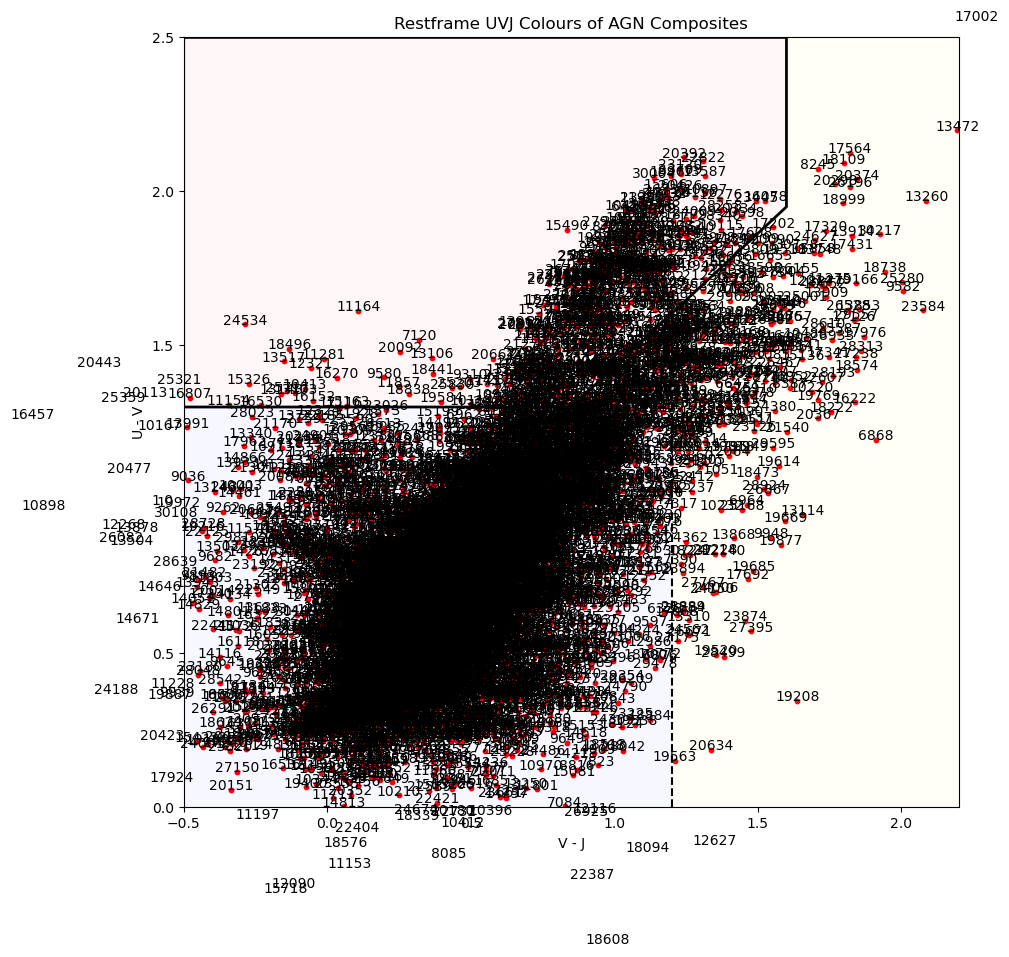

In [18]:
# Now we can plot these in UVJ space, including their relevant labels, and UV/VJ positions
from adjustText import adjust_text

plt.figure(figsize=(10, 10))

plt.scatter(vj_colours, uv_colours, c='r', s=10)

annotations = []

# Annotate points with text and adjust for collisions
texts = []
for i, txt in enumerate(new_objname_list):
    txt = f"{txt}" #({vj_colours[i]:.2f}, {uv_colours[i]:.2f})"
    texts.append(plt.text(vj_colours[i], uv_colours[i], txt, ha='center'))

# Adjust text to avoid collisions
#adjust_text(texts)

plt.ylabel('U - V')
plt.xlabel('V - J')
plt.title("Restframe UVJ Colours of AGN Composites")
plt.xlim([-0.5, 2.2])
plt.ylim([0, 2.5])

# Define paths for selections
path_quiescent = [[-0.5, 1.3], [0.85, 1.3], [1.6, 1.95], [1.6, 2.5], [-0.5, 2.5]]
path_sf = [[-0.5, 0.0], [-0.5, 1.3], [0.85, 1.3], [1.2, 1.60333], [1.2, 0.0]]
path_sfd = [[1.2, 0.0], [1.2, 1.60333], [1.6, 1.95], [1.6, 2.5], [2.2, 2.5], [2.2, 0.0]]

# Add patches for selections
plt.gca().add_patch(plt.Polygon(path_quiescent, closed=True, fill=True, facecolor=(1, 0, 0, 0.03), edgecolor='k', linewidth=2, linestyle='solid'))
plt.gca().add_patch(plt.Polygon(path_sf, closed=True, fill=True, facecolor=(0, 0, 1, 0.03)))
plt.gca().add_patch(plt.Polygon(path_sfd, closed=True, fill=True, facecolor=(1, 1, 0, 0.03)))

# Add vertical line
plt.axvline(1.2, color='black', linestyle='--', ymin=0, ymax=1.60333/2.5)

# output the plot, and save it
plt.savefig('outputs/UVJPlots/RecalculatedUVJ_Positions.png')

plt.show()



In [19]:
# # Now we can plot these in UVJ space, including their relevant labels, and UV/VJ positions

# plt.figure(figsize=(10, 10))

# plt.scatter(vj_colours, uv_colours, c='r', s=10)

# # Adjust text to avoid collisions
# adjust_text(texts)

# plt.ylabel('U - V')
# plt.xlabel('V - J')
# plt.title("Restframe UVJ Colours of AGN Composites")
# plt.xlim([-0.5, 2.2])
# plt.ylim([0, 2.5])

# # Define paths for selections
# path_quiescent = [[-0.5, 1.3], [0.85, 1.3], [1.6, 1.95], [1.6, 2.5], [-0.5, 2.5]]
# path_sf = [[-0.5, 0.0], [-0.5, 1.3], [0.85, 1.3], [1.2, 1.60333], [1.2, 0.0]]
# path_sfd = [[1.2, 0.0], [1.2, 1.60333], [1.6, 1.95], [1.6, 2.5], [2.2, 2.5], [2.2, 0.0]]

# # Add patches for selections
# plt.gca().add_patch(plt.Polygon(path_quiescent, closed=True, fill=True, facecolor=(1, 0, 0, 0.03), edgecolor='k', linewidth=2, linestyle='solid'))
# plt.gca().add_patch(plt.Polygon(path_sf, closed=True, fill=True, facecolor=(0, 0, 1, 0.03)))
# plt.gca().add_patch(plt.Polygon(path_sfd, closed=True, fill=True, facecolor=(1, 1, 0, 0.03)))

# # Add vertical line
# plt.axvline(1.2, color='black', linestyle='--', ymin=0, ymax=1.60333/2.5)


# plt.show()

In [20]:

df = uv_vj_df
df


,ID,UV,VJ
0,10002,0.665034,0.304816
1,10003,1.032593,-0.302140
2,10019,0.784214,0.479189
3,10020,0.942676,-0.037427
4,10029,0.978791,0.462154
...,...,...,...
6971,9983,0.262194,0.789665
6972,9988,0.364083,0.139011
6973,9992,0.566491,0.465869
6974,9994,0.249918,0.071723


         ID        UV        VJ  GalaxyType
29    10114  1.308322  0.502682         0.0
83    10339  1.525096  0.760808         0.0
105   10413  1.359342 -0.078807         0.0
113   10440  1.760964  1.105806         0.0
114   10451  1.328017  0.833018         0.0
...     ...       ...       ...         ...
6894   9643  1.868150  1.085763         0.0
6933   9827  1.653819  0.954493         0.0
6936   9840  1.562759  0.926834         0.0
6954   9915  1.350899  0.755265         0.0
6970   9974  1.804825  0.935615         0.0

[402 rows x 4 columns]
         ID        UV        VJ  GalaxyType
29    10114  1.308322  0.502682         0.0
83    10339  1.525096  0.760808         0.0
105   10413  1.359342 -0.078807         0.0
113   10440  1.760964  1.105806         0.0
114   10451  1.328017  0.833018         0.0
...     ...       ...       ...         ...
6894   9643  1.868150  1.085763         0.0
6933   9827  1.653819  0.954493         0.0
6936   9840  1.562759  0.926834         0.0
6954   9

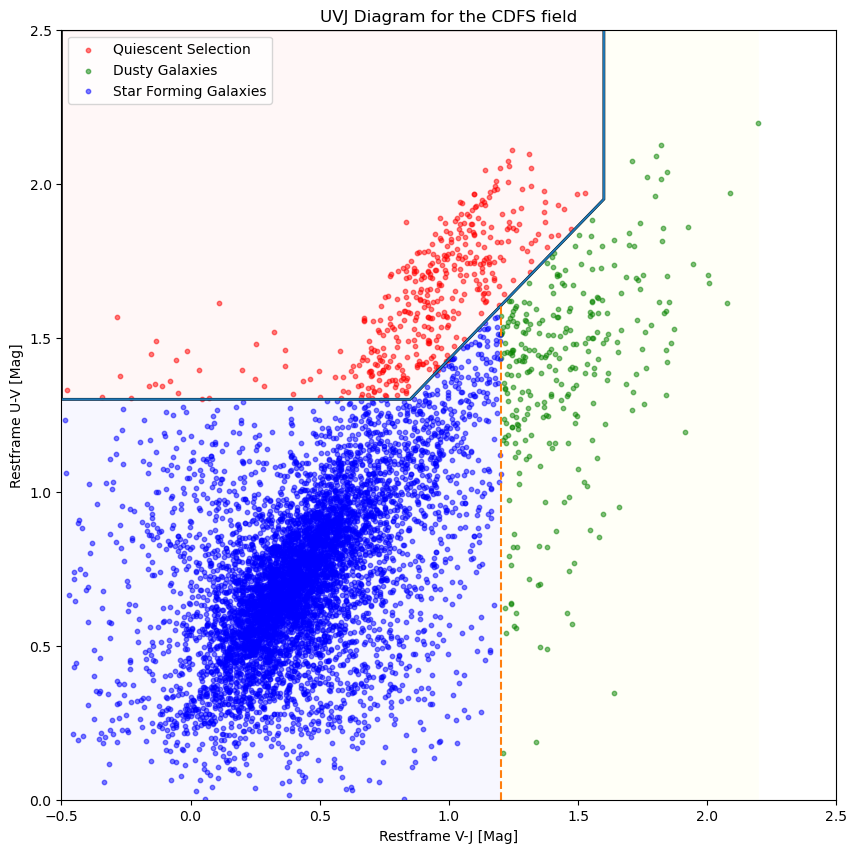

In [22]:

# Plot the UVJ diagram
plt.figure(figsize=(10, 10))

x = df['VJ']
y = df['UV']
id = df['ID']

xmax = 2.5
ymax = 2.5
xmin = -0.5
ymin = 0

# Set the plotting limits
plt.xlim(xmin, xmax)
plt.ylim(ymin, ymax)

# Define the points for a quiescent galaxy selection
x_points = [-0.5, 0.85, 1.6, 1.6]
y_points = [1.3, 1.3, 1.95, 2.5]

# Plot the points
plt.plot(x_points, y_points, linestyle='-')

# Interpolate the y-value at x=1.2
x_target = 1.2
y_target = np.interp(x_target, x_points, y_points)

# Plot the interpolated point, this separates everything on the right as dusty galaxies,
# and everything on the left as star-forming galaxies
plt.plot([x_target, x_target], [0, y_target], linestyle='--')

quiescent_x = [-0.5, 0.85, 1.6, 1.6, xmin, xmin]
quiescent_y = [1.3, 1.3, 1.95, 2.5, ymax, 1.3]
# We want to make a wedge selection for the Quiescent Selection of Galaxies
points = np.column_stack([x, y])
verts = np.array([quiescent_x, quiescent_y]).T
path = mpath.Path(verts)


# Define the path for point selection
#selected_path = mpath.Path([(2, 3), (6, 4), (8, 2), (2, 1), (2, 3)])  # Example path, replace with your own

# Use path.contains_points to get a boolean array
points_inside_selection = path.contains_points(np.column_stack([x, y]))



dusty_condition = (points[:, 0] > x_target) & (~points_inside_selection)
star_forming_condition = (points[:, 0] < x_target) & (~points_inside_selection)



# Filter the DataFrame using the boolean array
selected_df = df[points_inside_selection] # For quiescent, clean later

# Mark dusty, and star-forming galaxies
df.loc[dusty_condition, 'GalaxyType'] = 2
df.loc[star_forming_condition, 'GalaxyType'] = 1




print(selected_df)
#print(unselected_df)

# Now we can easily select the quiescent galaxies and set the galaxy type to quiescent - 0 or starforming 1.
print(selected_df)
selected_ids = selected_df['ID']
df.loc[df['ID'].isin(selected_ids), 'GalaxyType'] = 0 # This is what makes the selection happen



# Try do the same for the unselected galaxies, noting that the unselected galaxies with x and y > 1.2 are dusty galaxies, and the rest are star-forming galaxies
#unselected_ids = unselected_df['id']




# Sort the quiescent and non-quiescent galaxies
quiescent_points = points[path.contains_points(points)]
# Find the points from here to categorise dusty, and star-forming galaxies
non_quiescent_points = points[~path.contains_points(points)]
dusty_galaxies_points = non_quiescent_points[non_quiescent_points[:, 0] > x_target]
star_forming_galaxies_points = non_quiescent_points[non_quiescent_points[:, 0] < x_target]


#print(non_quiescent_points[0][0])

#print(y)
# Plot the selected points
#plt.scatter(x, y, s=3, alpha=0.5, label='Not Quiescent Selection')
plt.scatter(quiescent_points[:, 0], quiescent_points[:, 1], c='r', s=10, alpha=0.5, label='Quiescent Selection')
plt.scatter(dusty_galaxies_points[:, 0], dusty_galaxies_points[:, 1], c='g', s=10, alpha=0.5, label='Dusty Galaxies')
plt.scatter(star_forming_galaxies_points[:, 0], star_forming_galaxies_points[:, 1], c='b', s=10, alpha=0.5, label='Star Forming Galaxies')

# Plot the names for the selected galaxies, in each reigon
# text = []
# for i in range(len(df)):
#    text.append(plt.text(df.iloc[i]['VJ'], df.iloc[i]['UV'], df.iloc[i]['ID']))
# adjust_text(text)



plt.gca().add_patch(plt.Polygon(path_quiescent, closed=True, fill=True, facecolor=(1, 0, 0, 0.03), edgecolor='k', linewidth=2, linestyle='solid'))
plt.gca().add_patch(plt.Polygon(path_sf, closed=True, fill=True, facecolor=(0, 0, 1, 0.03)))
plt.gca().add_patch(plt.Polygon(path_sfd, closed=True, fill=True, facecolor=(1, 1, 0, 0.03)))


plt.xlabel('Restframe V-J [Mag]')
plt.ylabel('Restframe U-V [Mag]')
plt.title('UVJ Diagram for the CDFS field')
plt.legend()
plt.show()


In [23]:
df

,ID,UV,VJ,GalaxyType
0,10002,0.665034,0.304816,1.0
1,10003,1.032593,-0.302140,1.0
2,10019,0.784214,0.479189,1.0
3,10020,0.942676,-0.037427,1.0
4,10029,0.978791,0.462154,1.0
...,...,...,...,...
6971,9983,0.262194,0.789665,1.0
6972,9988,0.364083,0.139011,1.0
6973,9992,0.566491,0.465869,1.0
6974,9994,0.249918,0.071723,1.0


In [24]:
# Finally export the dataframe to a csv, containing the recalculated UVJ positions and galaxy type
def save_csv_with_numbered_name(df, save_path, file_name):
    # Check if the file already exists
    if os.path.isfile(os.path.join(save_path, f"{file_name}.csv")):
        # Append a number until a unique file name is found
        i = 1
        while os.path.isfile(os.path.join(save_path, f"{file_name}_{i}.csv")):
            i += 1
        file_name = f"{file_name}_{i}"
    
    # Save the DataFrame to CSV with the updated file name
    df.to_csv(os.path.join(save_path, f"{file_name}.csv"), index=False)
    print(f"CSV file saved as {file_name}.csv")

In [25]:
save_csv_with_numbered_name(df, 'Eazy Template Extractions', 'RecalculatedUVJids_full')

CSV file saved as RecalculatedUVJids_full.csv
